In [1]:
!wget https://www.dropbox.com/s/xg78kiae02d4u8f/Conan.jpg --no-check-certificate

--2021-11-09 10:12:27--  https://www.dropbox.com/s/xg78kiae02d4u8f/Conan.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xg78kiae02d4u8f/Conan.jpg [following]
--2021-11-09 10:12:28--  https://www.dropbox.com/s/raw/xg78kiae02d4u8f/Conan.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca4d7bc2b62ed2d1a380ead7599.dl.dropboxusercontent.com/cd/0/inline/BZqZi-N-WPTm5k9RcXBDvbgdAyz2XXepqvsPhmGN41mjXKMd8b3aWx7wMPenQGvBqXUKot-CfG2h_cfZEabtBDzRNnce2Yh-WKwVrNZ4X_UV6KM6uPZW3lzoCkT2IALJ2g5jJezAqtPindk1DiS7uO7m/file# [following]
--2021-11-09 10:12:28--  https://uca4d7bc2b62ed2d1a380ead7599.dl.dropboxusercontent.com/cd/0/inline/BZqZi-N-WPTm5k9RcXBDvbgdAyz2XXepqvsPhmGN41mjXKMd8b3aWx7wMPenQGvBqXUKot-CfG2h_cfZEabtBDzRNnce2Yh-WKw

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [4]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "Conan.jpg"
}

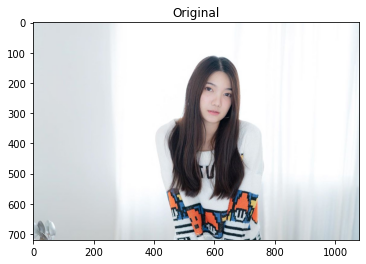

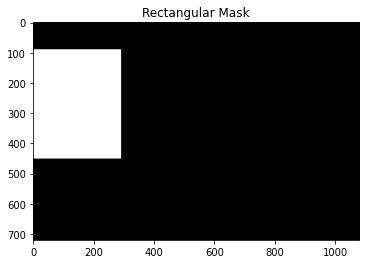

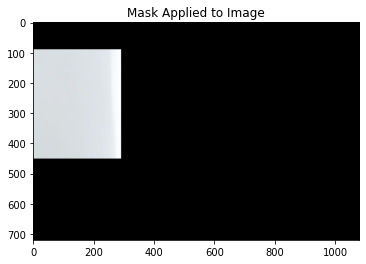

In [5]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 90), (290, 450), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

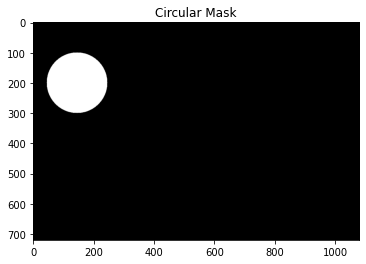

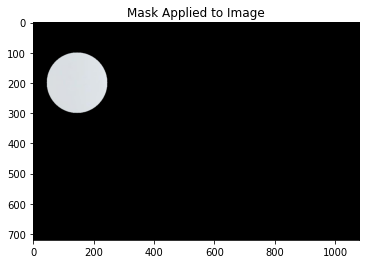

In [6]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (145, 200), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)